# Extra model cases

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as spr
from scipy.sparse.linalg import inv

## Different time scales for thinning

In [ ]:
intSave=10
year = 3600*24*365

xi = 0.2
rhoi = 920
rhow = 1000
g = 9.81
mu_w = 1e-3
S = 1e-6

perm=1e-15
K_t = perm*rhow*g/mu_w
D = K_t/S

h_init = 1e3
dh=100

L = 10e3
nx = int(5e2+1)
x = np.linspace(0,L,num=nx)
dx = x[1]-x[0]

C_D = 0.1
dt = (dx**2)*C_D/D
tf = year*2
nt = int(np.round(tf/dt) + 1)
t = np.linspace(0,tf,num=nt)

### 1 year ramp

In [ ]:
h = h_init*(rhoi/rhow)*np.ones(nx)
h_all_year = np.zeros([nx,int(nt/intSave)+1])
h_all_year[:,0] = h

ramp_time = 1 #in years
hbc_sfc  = np.zeros(int(nt));
bramp_bool = t < ramp_time*year
aramp_bool = t >= ramp_time*year
hbc_sfc[bramp_bool] = np.linspace(h_init,h_init-dh,np.count_nonzero(bramp_bool, axis=None))
hbc_sfc[aramp_bool] = h_init-dh;

dhdt = np.zeros_like(hbc_sfc)
dhdt[1:] = np.diff(hbc_sfc)/dt

Mld = np.zeros([3,nx])
Mld[0,:] = -0.5*C_D*np.ones(nx)
Mld[2,:] = -0.5*C_D*np.ones(nx)
Mld[1,:] = (1+C_D)*np.ones(nx)
Ml = spr.spdiags(Mld,[-1,0,1],nx,nx);
Ml = spr.csc_matrix(Ml)
Ml[-1,-1] = 1+0.5*C_D
Ml[0,1] = 0
Ml[0,0] = 1
iMl = inv(Ml)

Mrd = np.zeros([3,nx])
Mrd[0,:] = 0.5*C_D*np.ones(nx)
Mrd[2,:] = 0.5*C_D*np.ones(nx)
Mrd[1,:] = (1-C_D)*np.ones(nx)
Mr = spr.spdiags(Mrd,[-1,0,1],nx,nx);
Mr = spr.csc_matrix(Mr)
Mr[-1,-1] = 1-0.5*C_D
Mr[0,1] = 0
Mr[0,0] = 1

for k in np.arange(nt-1):
    hm = h
    hm.shape = (nx,1)
    h[0] = hbc_sfc[k]*(rhoi/rhow)
    
    Svec = np.zeros([nx,1])
    Svec[1:-2] = dt*xi*(rhoi/rhow)*dhdt[k]

    hnew = iMl.dot(Mr.dot(hm) + Svec)
    
    if k%intSave == 0:
        h_all_year[:,int(k/intSave)] = np.transpose(hnew)
    h = hnew

sfc_flux_year = np.transpose(K_t*(h_all_year[0,:]-h_all_year[1,:])/dx)

sflux_an_year = 2*(1-xi)*(rhoi/rhow)*dhdt*(K_t*S*t/np.pi)**0.5
sflux_an_delta_year = (1-xi)*(rhoi/rhow)*dh*(K_t*S/(np.pi*t))**0.5;

tsub = t[0:-1:intSave]
t_bramp_year = t < ramp_time*year
t_aramp_year = t > ramp_time*year/2

### 1 month ramp

In [ ]:
h = h_init*(rhoi/rhow)*np.ones(nx)
h_all_month = np.zeros([nx,int(nt/intSave)+1])
h_all_month[:,0] = h

ramp_time = 1/12 #in years
hbc_sfc  = np.zeros(int(nt));
bramp_bool = t < ramp_time*year
aramp_bool = t >= ramp_time*year
hbc_sfc[bramp_bool] = np.linspace(h_init,h_init-dh,np.count_nonzero(bramp_bool, axis=None))
hbc_sfc[aramp_bool] = h_init-dh;

dhdt = np.zeros_like(hbc_sfc)
dhdt[1:] = np.diff(hbc_sfc)/dt

Mld = np.zeros([3,nx])
Mld[0,:] = -0.5*C_D*np.ones(nx)
Mld[2,:] = -0.5*C_D*np.ones(nx)
Mld[1,:] = (1+C_D)*np.ones(nx)
Ml = spr.spdiags(Mld,[-1,0,1],nx,nx);
Ml = spr.csc_matrix(Ml)
Ml[-1,-1] = 1+0.5*C_D
Ml[0,1] = 0
Ml[0,0] = 1
iMl = inv(Ml)

Mrd = np.zeros([3,nx])
Mrd[0,:] = 0.5*C_D*np.ones(nx)
Mrd[2,:] = 0.5*C_D*np.ones(nx)
Mrd[1,:] = (1-C_D)*np.ones(nx)
Mr = spr.spdiags(Mrd,[-1,0,1],nx,nx);
Mr = spr.csc_matrix(Mr)
Mr[-1,-1] = 1-0.5*C_D
Mr[0,1] = 0
Mr[0,0] = 1

for k in np.arange(nt-1):
    hm = h
    hm.shape = (nx,1)
    h[0] = hbc_sfc[k]*(rhoi/rhow)
    
    Svec = np.zeros([nx,1])
    Svec[1:-2] = dt*xi*(rhoi/rhow)*dhdt[k]

    hnew = iMl.dot(Mr.dot(hm) + Svec)
    
    if k%intSave == 0:
        h_all_month[:,int(k/intSave)] = np.transpose(hnew)
    h = hnew

sfc_flux_month = np.transpose(K_t*(h_all_month[0,:]-h_all_month[1,:])/dx)

sflux_an_month = 2*(1-xi)*(rhoi/rhow)*dhdt*(K_t*S*t/np.pi)**0.5
sflux_an_delta_month = (1-xi)*(rhoi/rhow)*dh*(K_t*S/(np.pi*t))**0.5;

tsub = t[0:-1:intSave]
t_bramp_month = t < ramp_time*year
t_aramp_month = t > ramp_time*year/2

### 1 day

In [ ]:
h = h_init*(rhoi/rhow)*np.ones(nx)
h_all_day = np.zeros([nx,int(nt/intSave)+1])
h_all_day[:,0] = h

ramp_time = 1/365 #in years
hbc_sfc  = np.zeros(int(nt));
bramp_bool = t < ramp_time*year
aramp_bool = t >= ramp_time*year
hbc_sfc[bramp_bool] = np.linspace(h_init,h_init-dh,np.count_nonzero(bramp_bool, axis=None))
hbc_sfc[aramp_bool] = h_init-dh;

dhdt = np.zeros_like(hbc_sfc)
dhdt[1:] = np.diff(hbc_sfc)/dt

Mld = np.zeros([3,nx])
Mld[0,:] = -0.5*C_D*np.ones(nx)
Mld[2,:] = -0.5*C_D*np.ones(nx)
Mld[1,:] = (1+C_D)*np.ones(nx)
Ml = spr.spdiags(Mld,[-1,0,1],nx,nx);
Ml = spr.csc_matrix(Ml)
Ml[-1,-1] = 1+0.5*C_D
Ml[0,1] = 0
Ml[0,0] = 1
iMl = inv(Ml)

Mrd = np.zeros([3,nx])
Mrd[0,:] = 0.5*C_D*np.ones(nx)
Mrd[2,:] = 0.5*C_D*np.ones(nx)
Mrd[1,:] = (1-C_D)*np.ones(nx)
Mr = spr.spdiags(Mrd,[-1,0,1],nx,nx);
Mr = spr.csc_matrix(Mr)
Mr[-1,-1] = 1-0.5*C_D
Mr[0,1] = 0
Mr[0,0] = 1

for k in np.arange(nt-1):
    hm = h
    hm.shape = (nx,1)
    h[0] = hbc_sfc[k]*(rhoi/rhow)
    
    Svec = np.zeros([nx,1])
    Svec[1:-2] = dt*xi*(rhoi/rhow)*dhdt[k]

    hnew = iMl.dot(Mr.dot(hm) + Svec)
    
    if k%intSave == 0:
        h_all_day[:,int(k/intSave)] = np.transpose(hnew)
    h = hnew

sfc_flux_day = np.transpose(K_t*(h_all_day[0,:]-h_all_day[1,:])/dx)

sflux_an_day = 2*(1-xi)*(rhoi/rhow)*dhdt*(K_t*S*t/np.pi)**0.5
sflux_an_delta_day = (1-xi)*(rhoi/rhow)*dh*(K_t*S/(np.pi*t))**0.5;

tsub = t[0:-1:intSave]
t_bramp_day = t < ramp_time*year
t_aramp_day = t > ramp_time*year/2

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(2, 1, 1)
#year
ax1.plot(12*tsub/year,-1000*sfc_flux_year*year, 'x', color='black', linewidth=5, label = "Numerical Solution")
ax1.plot(12*t[t_bramp_year]/year,-1000*sflux_an_year[t_bramp_year]*year, '-', color='black', linewidth=2,label = "q_c")
ax1.plot(12*t[t_aramp_year]/year + 12/2,1000*sflux_an_delta_year[t_aramp_year]*year, '-', color='black', linewidth=3,label = "q_d")

#month
ax1.plot(12*tsub/year,-1000*sfc_flux_month*year, 'x', color='red', linewidth=5, label = "Numerical Solution")
ax1.plot(12*t[t_bramp_month]/year,-1000*sflux_an_month[t_bramp_month]*year, '-', color='red', linewidth=2,label = "q_c")
ax1.plot(12*t[t_aramp_month]/year + 1/2,1000*sflux_an_delta_month[t_aramp_month]*year, '-', color='red', linewidth=3,label = "q_d")

#day
ax1.plot(12*tsub/year,-1000*sfc_flux_day*year, 'x', color='blue', linewidth=5, label = "Numerical Solution")
ax1.plot(12*t[t_bramp_day]/year,-1000*sflux_an_day[t_bramp_day]*year, '-', color='blue', linewidth=2,label = "q_c")
ax1.plot(12*t[t_aramp_day]/year + 1/365/2,1000*sflux_an_delta_day[t_aramp_day]*year, '-', color='blue', linewidth=3,label = "q_d")

ax1.set_xlabel('time (months)',fontsize=18)
ax1.set_ylabel('Exfiltration flux (mm/yr)',fontsize=18)
#plt.legend()
ax1.set_ylim(0,700)
ax1.set_xlim(0,24)
#legend('Numerical','Analytic Constant','Analytic Delta','Location','NorthEast')
#ax1.savefig('Exfil_NumericalDiff_TimeDepLoad_supp_zoomout.png', bbox_inches='tight')
ax1.text(0.96, 0.88, '(a)', va='bottom', ha='center',transform=ax1.transAxes, fontsize=20)

#year
ax2 = plt.subplot(2, 1, 2)
ax2.plot(365*tsub/year,-1000*sfc_flux_year*year, 'x', color='black', linewidth=3, label = "Numerical Solution")
ax2.plot(365*t[t_bramp_year]/year,-1000*sflux_an_year[t_bramp_year]*year, '-', color='black', linewidth=3,label = "q_c")
ax2.plot(365*(t[t_aramp_year]/year + 12/2),1000*sflux_an_delta_year[t_aramp_year]*year, '-', color='black', linewidth=3,label = "q_d")

#month
ax2.plot(365*tsub/year,-1000*sfc_flux_month*year, 'x', color='red', linewidth=3, label = "Numerical Solution")
ax2.plot(365*t[t_bramp_month]/year,-1000*sflux_an_month[t_bramp_month]*year, '-', color='red', linewidth=3,label = "q_c")
ax2.plot(365*(t[t_aramp_month]/year + 1/2),1000*sflux_an_delta_month[t_aramp_month]*year, '-', color='red', linewidth=3,label = "q_d")

#day
ax2.plot(365*tsub/year,-1000*sfc_flux_day*year, 'x', color='blue', linewidth=3, label = "Numerical Solution")
ax2.plot(365*t[t_bramp_day]/year,-1000*sflux_an_day[t_bramp_day]*year, '-', color='blue', linewidth=3,label = "q_c")
ax2.plot(365*(t[t_aramp_day]/year + 1/365/2),1000*sflux_an_delta_day[t_aramp_day]*year, '-', color='blue', linewidth=3,label = "q_d")

ax2.set_xlabel('time (days)',fontsize=18)
ax2.set_ylabel('Exfiltration flux (mm/yr)',fontsize=18)
#plt.legend()
ax2.set_ylim(0,700)
ax2.set_xlim(0,30)
ax2.text(0.96, -0.34, '(b)', va='bottom', ha='center',transform=ax1.transAxes, fontsize=20)
#legend('Numerical','Analytic Constant','Analytic Delta','Location','NorthEast')
plt.savefig('Exfil_NumericalDiff_TimeDepLoad_supp_2panel.png', bbox_inches='tight')

## Compare predicted exfiltration rates to other basal melt estimates

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import cmocean
#import netCDF4 as nc
import scipy.io as sio
from scipy import interpolate

In [2]:
da = xr.open_rasterio('./ICESat1_ICESat2_mass_change/ais_grounded.tif')
#for some reason there appears to be a systematic offset (stretching) between 
#the built-in cartopy projection and the coordinates in smith 2020
y = 1.03*da[0].y
x = 1.03*da[0].x

#dhdt = np.flipud(da.variable.data[0])
dhdt = da.variable.data[0]
#transform = Affine.from_gdal(*da.attrs['transform'])

xx, yy = np.meshgrid(x, y)

/usr/local/anaconda3/envs/exfilmap/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  """Entry point for launching an IPython kernel.


In [3]:
year = 3600*24*365
rhoi = 920
rhow = 1000
g = 9.81
mu_w = 1e-3

perm=1e-13
K_t = perm*rhow*g/mu_w
S = 1e-6
xi = 0.2

deltat = 16*year
exfil_analytic = -2*(1-xi)*(rhoi/rhow)*dhdt*(K_t*S*deltat/np.pi)**0.5
#exfil_analytic[dhdt>0] = nan

### PIK PISM

In [13]:
mat_contents = sio.loadmat('ISMIP6_AIS_PIK_PISM1_ctrl_proj_open_basalmelt_smithgrid.mat',struct_as_record=False)
bmr = mat_contents['bmr_smithgrid']

exfilfrac_basalmelt_PIK = exfil_analytic/(bmr+exfil_analytic)
#exfilfrac_basalmelt[bmr==0] = np.nan
#x_pattyn = np.arange(-2800000,2805000,5000)
#xx_pattyn,yy_pattyn = np.meshgrid(x_pattyn,x_pattyn)

In [14]:
mat_contents = sio.loadmat('ISMIP6_ILTS_PIK_SICOPOLIS_ctrl_proj_std_basalmelt_smithgrid.mat',struct_as_record=False)
bmr = mat_contents['bmr_smithgrid']

exfilfrac_basalmelt_SICOPOLIS = exfil_analytic/(bmr+exfil_analytic)
#exfilfrac_basalmelt[bmr==0] = np.nan
#x_pattyn = np.arange(-2800000,2805000,5000)
#xx_pattyn,yy_pattyn = np.meshgrid(x_pattyn,x_pattyn)

In [15]:
mat_contents = sio.loadmat('Liefferinge2013_basalmelt_smithgrid.mat',struct_as_record=False)
bmr = mat_contents['basalmelt_smithgrid']

exfilfrac_basalmelt_lief = exfil_analytic/(bmr+exfil_analytic)
#exfilfrac_basalmelt[bmr<1e-3] = np.nan
#x_pattyn = np.arange(-2800000,2805000,5000)
#xx_pattyn,yy_pattyn = np.meshgrid(x_pattyn,x_pattyn)

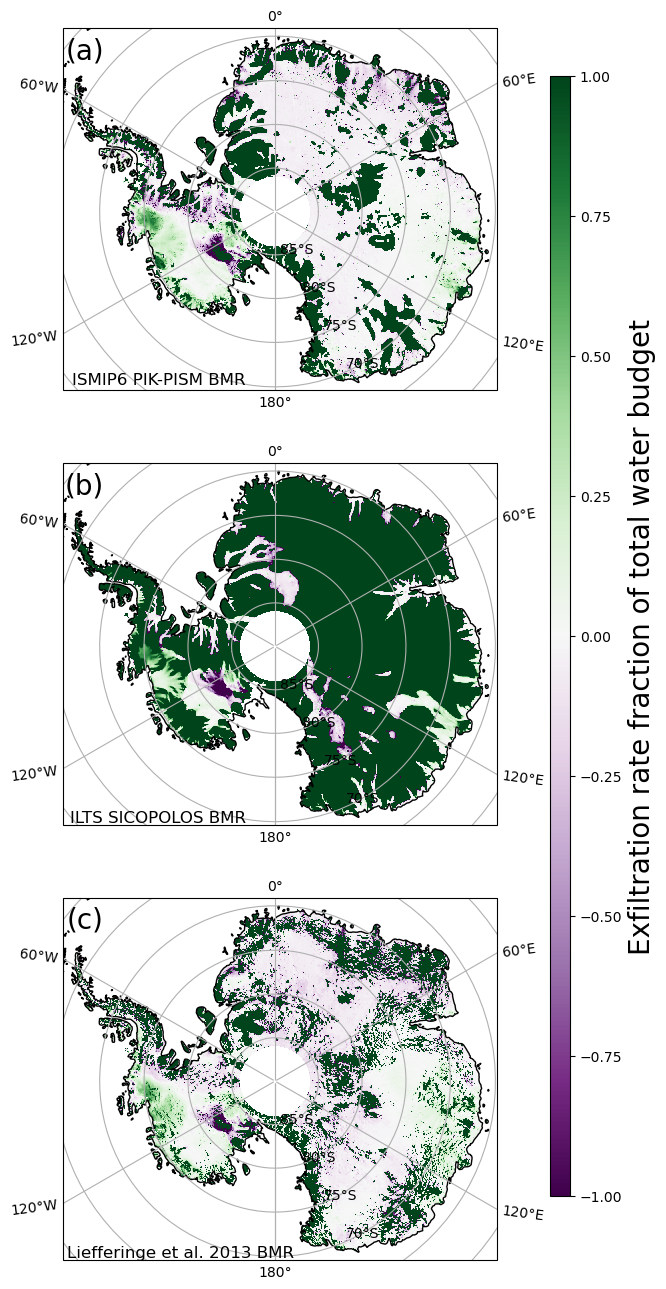

In [30]:
projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(8, 16))
ax1 = plt.subplot(3, 1, 1, projection=projection)
p1 = ax1.pcolormesh(xx, yy, exfilfrac_basalmelt_PIK, cmap='PRGn',vmin=-1,vmax=1)
ax1.set_extent([min(x)*1.05, max(x)*1.05, min(y)*1.05, max(y)*1.05], crs=ccrs.SouthPolarStereo()) 
ax1.coastlines()
ax1.gridlines(draw_labels=True)
ax1.text(0.22, 0.01, 'ISMIP6 PIK-PISM BMR', va='bottom', ha='center',transform=ax1.transAxes, fontsize=12)
ax1.text(0.05, 0.9, '(a)', va='bottom', ha='center',transform=ax1.transAxes, fontsize=20)
#ax1.title('ISMIP6 PIK-PISM BMR',fontsize=20)

ax2 = plt.subplot(3, 1, 2, projection=projection)
p2 = ax2.pcolormesh(xx, yy, exfilfrac_basalmelt_SICOPOLIS, cmap='PRGn',vmin=-1,vmax=1)
ax2.set_extent([min(x)*1.05, max(x)*1.05, min(y)*1.05, max(y)*1.05], crs=ccrs.SouthPolarStereo()) 
ax2.coastlines()
ax2.gridlines(draw_labels=True)
ax2.text(0.22, -1.2, 'ILTS SICOPOLOS BMR', va='bottom', ha='center',transform=ax1.transAxes, fontsize=12)
ax2.text(0.05, -0.3, '(b)', va='bottom', ha='center',transform=ax1.transAxes, fontsize=20)

ax3 = plt.subplot(3, 1, 3, projection=projection)
p3 = ax3.pcolormesh(xx, yy, exfilfrac_basalmelt_lief, cmap='PRGn',vmin=-1,vmax=1)
ax3.set_extent([min(x)*1.05, max(x)*1.05, min(y)*1.05, max(y)*1.05], crs=ccrs.SouthPolarStereo()) 
ax3.coastlines()
ax3.gridlines(draw_labels=True)
ax3.text(0.27, -2.4, 'Liefferinge et al. 2013 BMR', va='bottom', ha='center',transform=ax1.transAxes, fontsize=12)
ax3.text(0.05, -1.5, '(c)', va='bottom', ha='center',transform=ax1.transAxes, fontsize=20)
#ax3.title('Liefferinge et al. 2013 BMR',fontsize=20)

cax = plt.axes([0.85, 0.15, 0.025, 0.7])
cb = plt.colorbar(p1, cax=cax, orientation='vertical')
cb.ax.set_ylabel('Exfiltration rate fraction of total water budget',fontsize=20);
plt.savefig('IceSat2_thinningexfil_fraction_all.png', bbox_inches='tight',dpi=200)

# Calculate percentages

In [10]:
import geopandas as gpd
import rioxarray

In [11]:
iceshelvesmask = gpd.read_file('iceShelves.geojson')
icems = iceshelvesmask.to_crs({'init': 'epsg:3031'}); 

da_wais = da.rio.clip(icems.loc[[4],'geometry'])
dhdt_wais = da_wais.variable.data[0]

da_thwaites = da.rio.clip(icems.loc[[26],'geometry'])
dhdt_thwaites = da_thwaites.variable.data[0]

da_pig = da.rio.clip(icems.loc[[27],'geometry'])
dhdt_pig = da_pig.variable.data[0]

/usr/local/anaconda3/envs/exfilmap/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
Warning 1: +init=epsg:XXXX syntax is deprecated. It might return a CRS with a non-EPSG compliant axis order.


In [12]:
exfil_analytic = -2*(1-xi)*(rhoi/rhow)*dhdt*(K_t*S*deltat/np.pi)**0.5
exfil_analytic_wais = -2*(1-xi)*(rhoi/rhow)*dhdt_wais*(K_t*S*deltat/np.pi)**0.5
exfil_analytic_thwaites = -2*(1-xi)*(rhoi/rhow)*dhdt_thwaites*(K_t*S*deltat/np.pi)**0.5
exfil_analytic_pig = -2*(1-xi)*(rhoi/rhow)*dhdt_pig*(K_t*S*deltat/np.pi)**0.5
#exfil_analytic[dhdt>0] = nan

In [ ]:
exfilfrac_basalmelt = exfil_analytic/(bmr+exfil_analytic)
#x_pattyn = np.arange(-2800000,2805000,5000)
#xx_pattyn,yy_pattyn = np.meshgrid(x_pattyn,x_pattyn)

da2 = da
da2.variable.data[0] = bmr
da2_wais = da2.rio.clip(icems.loc[[4],'geometry'])
bmr_wais = da2_wais.variable.data[0]

da3 = da
da3.variable.data[0] = bmr
da3_thwaites = da3.rio.clip(icems.loc[[26],'geometry'])
bmr_thwaites = da3_thwaites.variable.data[0]

da4 = da
da4.variable.data[0] = bmr
da4_pig = da4.rio.clip(icems.loc[[27],'geometry'])
bmr_pig = da4_pig.variable.data[0]

In [13]:
bmrtotal_aa = np.nansum(bmr*(5e3**2))*1000/1e12

exfil_analytic_justex = exfil_analytic
exfil_analytic_justex[dhdt>0] = np.nan
exfil_aa = np.nansum(exfil_analytic_justex*(5e3**2))*1000/1e12

exfil_aa/(bmrtotal_aa+exfil_aa)

0.03780614139847165

In [15]:
exfil_aa

6.916340736